In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import display
from pkdb_analysis import PKFilter, PKFilterFactory, PKData
import pandas as pd

# Curation and checking of studies
Helpers for simple checking of curated results.

In [2]:
# get data for study
study_name = "Backman1996"
pkfilter = PKFilterFactory.by_study_name(study_name)
data = PKData.from_db(pkfilter=pkfilter)
print(data)

------------------------------
PKData (140437860670992)
------------------------------
studies             1 
groups              1  (   13)
individuals        10  (  120)
interventions       2  (    2)
outputs            96  (  144)
timecourses         2  (    3)
------------------------------


## Explore data content

In [3]:
print(data.groups_pks)
print(data.individuals_pks)

{17}
{32, 33, 34, 35, 36, 37, 38, 29, 30, 31}


In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data.groups_mi)
    
display(data.individuals_mi)
display(data.interventions_mi)
display(data.outputs_mi)
display(data.timecourses_mi)

study_sid   study_name group_name  group_count  \
group_pk characteristica_pk                                                   
17       342                 PKDB00227  Backman1996        all           10   
         343                 PKDB00227  Backman1996        all           10   
         344                 PKDB00227  Backman1996        all           10   
         345                 PKDB00227  Backman1996        all           10   
         346                 PKDB00227  Backman1996        all           10   
         347                 PKDB00227  Backman1996        all           10   
         348                 PKDB00227  Backman1996        all           10   
         349                 PKDB00227  Backman1996        all           10   
         350                 PKDB00227  Backman1996        all           10   
         351                 PKDB00227  Backman1996        all           10   
         352                 PKDB00227  Backman1996        all           10   
         353                 PKDB00227  Backman1996        all           10   
         354                 PKDB00227  Backman1996        all           10   

                             group_parent_pk  count     measurement_type  \
group_pk characteristica_pk                                                
17       342                              -1     10              species   
         343                              -1      5                  sex   
         344                              -1      5                  sex   
         345                              -1     10                  age   
         346                              -1     10               weight   
         347                              -1     10              healthy   
         348                              -1     10           medication   
         349                              -1     10  oral contraceptives   
         350                              -1     10   abstinence alcohol   
         351                              -1     10   abstinence smoking   
         352                              -1     10           abstinence   
         353                              -1     10           abstinence   
         354                              -1     10   fasting (duration)   

                                   choice substance  value  mean  median  \
group_pk characteristica_pk                                                
17       342                 homo sapiens      None    NaN   NaN     NaN   
         343                            M      None    NaN   NaN     NaN   
         344                            F      None    NaN   NaN     NaN   
         345                         None      None    NaN   NaN     NaN   
         346                         None      None    NaN   NaN     NaN   
         347                            Y      None    NaN   NaN     NaN   
         348                            N      None    NaN   NaN     NaN   
         349                            N      None    NaN   NaN     NaN   
         350                         None      None    NaN   NaN     NaN   
         351                         None      None    NaN   NaN     NaN   
         352                         None    coffee    NaN   NaN     NaN   
         353                         None       tea    NaN   NaN     NaN   
         354                         None      None    NaN   NaN     NaN   

                                   min   max  sd  se  cv      unit  
group_pk characteristica_pk                                         
17       342                       NaN   NaN NaN NaN NaN      None  
         343                       NaN   NaN NaN NaN NaN      None  
         344                       NaN   NaN NaN NaN NaN      None  
         345                 19.000000  30.0 NaN NaN NaN        yr  
         346                 50.000000  93.0 NaN NaN NaN  kilogram  
         347                       NaN   NaN NaN NaN NaN      None  
         

study_sid   study_name individual_name  \
individual_pk characteristica_pk                                           
29            342                 PKDB00227  Backman1996             p01   
              347                 PKDB00227  Backman1996             p01   
              348                 PKDB00227  Backman1996             p01   
              349                 PKDB00227  Backman1996             p01   
              350                 PKDB00227  Backman1996             p01   
...                                     ...          ...             ...   
38            353                 PKDB00227  Backman1996             p10   
              354                 PKDB00227  Backman1996             p10   
              412                 PKDB00227  Backman1996             p10   
              413                 PKDB00227  Backman1996             p10   
              414                 PKDB00227  Backman1996             p10   

                                  individual_group_pk  count  \
individual_pk characteristica_pk                               
29            342                                  17     10   
              347                                  17     10   
              348                                  17     10   
              349                                  17     10   
              350                                  17     10   
...                                               ...    ...   
38            353                                  17     10   
              354                                  17     10   
              412                                  17      1   
              413                                  17      1   
              414                                  17      1   

                                     measurement_type        choice substance  \
individual_pk characteristica_pk                                                
29            342                             species  homo sapiens      None   
              347                             healthy             Y      None   
              348                          medication             N      None   
              349                 oral contraceptives             N      None   
              350                  abstinence alcohol          None      None   
...                                               ...           ...       ...   
38            353                          abstinence          None       tea   
              354                  fasting (duration)          None      None   
              412                                 age          None      None   
              413                              weight          None      None   
              414                                 sex             F      None   

                                  value  mean  median    min  max  sd  se  cv  \
individual_pk characteristica_pk                                                
29            342                   NaN   NaN     NaN    NaN  NaN NaN NaN NaN   
              347                   NaN   NaN     NaN    NaN  NaN NaN NaN NaN   
              348                   NaN   NaN     NaN    NaN  NaN NaN NaN NaN   
              349                   NaN   NaN     NaN    NaN  NaN NaN NaN NaN   
              350                   NaN   NaN     NaN  6.000  NaN NaN NaN NaN   
...                                 ...   ...     ...    ...  ...  ..  ..  ..   
38            353                   NaN   NaN     NaN  6.000  NaN NaN NaN NaN   
              354                   NaN   NaN     NaN  0.125  NaN NaN NaN NaN   
              412                  19.0   NaN     NaN    NaN  NaN NaN NaN NaN   
              413                  75.0   NaN     NaN    NaN  NaN NaN NaN NaN   
              414                   NaN   NaN     NaN    NaN  NaN NaN NaN NaN   

                                      unit  
individual_pk characteristica_pk            
29            

,study_sid,study_name,raw_pk,normed,name,route,form,application,time,time_unit,...,substance,value,mean,median,min,max,sd,se,cv,unit
intervention_pk,,,,,,,,,,,,,,,,,,,,,
64,PKDB00227,Backman1996,63,True,MID,oral,tablet,single dose,0.0,hr,...,midazolam,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gram
66,PKDB00227,Backman1996,65,True,RIF,oral,capsule,multiple dose,-5.0,day,...,rifampicin,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gram / hour


study_sid   study_name  \
output_pk intervention_pk group_pk individual_pk                           
1083      64              -1        29            PKDB00227  Backman1996   
1084      64              -1        30            PKDB00227  Backman1996   
1085      64              -1        31            PKDB00227  Backman1996   
1086      64              -1        32            PKDB00227  Backman1996   
1087      64              -1        33            PKDB00227  Backman1996   
...                                                     ...          ...   
1192      66               17      -1             PKDB00227  Backman1996   
1193      64               17      -1             PKDB00227  Backman1996   
          66               17      -1             PKDB00227  Backman1996   
1194      64               17      -1             PKDB00227  Backman1996   
          66               17      -1             PKDB00227  Backman1996   

                                                  normed  calculated  tissue  \
output_pk intervention_pk group_pk individual_pk                               
1083      64              -1        29              True       False  plasma   
1084      64              -1        30              True       False  plasma   
1085      64              -1        31              True       False  plasma   
1086      64              -1        32              True       False  plasma   
1087      64              -1        33              True       False  plasma   
...                                                  ...         ...     ...   
1192      66               17      -1               True        True  plasma   
1193      64               17      -1               True        True  plasma   
          66               17      -1               True        True  plasma   
1194      64               17      -1               True        True  plasma   
          66               17      -1               True        True  plasma   

                                                  time time_unit  \
output_pk intervention_pk group_pk individual_pk                   
1083      64              -1        29             NaN      None   
1084      64              -1        30             NaN      None   
1085      64              -1        31             NaN      None   
1086      64              -1        32             NaN      None   
1087      64              -1        33             NaN      None   
...                                                ...       ...   
1192      66               17      -1              NaN      None   
1193      64               17      -1              NaN      None   
          66               17      -1              NaN      None   
1194      64               17      -1              NaN      None   
          66               17      -1              NaN      None   

                                                 measurement_type choice  \
output_pk intervention_pk group_pk individual_pk                           
1083      64              -1        29                       cmax   None   
1084      64              -1        30                       cmax   None   
1085      64              -1        31                       cmax   None   
1086      64              -1        32                       cmax   None   
1087      64              -1        33                       cmax   None   
...                                                           ...    ...   
1192      66               17      -1                       thalf   None   
1193      64               17      -1                          vd   None   
          66               17      -1                          vd   None   
1194      64               17      -1                        tmax   None   
          66               17      -1                        tmax   None   

                                                  substance     value  \
output_pk intervention_pk group_pk individual_pk                        


study_sid   study_name  \
timecourse_pk intervention_pk group_pk individual_pk                           
45            64              17       -1             PKDB00227  Backman1996   
46            64              17       -1             PKDB00227  Backman1996   
              66              17       -1             PKDB00227  Backman1996   

                                                      normed  tissue  \
timecourse_pk intervention_pk group_pk individual_pk                   
45            64              17       -1               True  plasma   
46            64              17       -1               True  plasma   
              66              17       -1               True  plasma   

                                                                                                   time  \
timecourse_pk intervention_pk group_pk individual_pk                                                      
45            64              17       -1             [0.0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, ...   
46            64              17       -1             [0.0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, ...   
              66              17       -1             [0.0, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, ...   

                                                     time_unit  \
timecourse_pk intervention_pk group_pk individual_pk             
45            64              17       -1                   hr   
46            64              17       -1                   hr   
              66              17       -1                   hr   

                                                     measurement_type choice  \
timecourse_pk intervention_pk group_pk individual_pk                           
45            64              17       -1               concentration   None   
46            64              17       -1               concentration   None   
              66              17       -1               concentration   None   

                                                      substance value  \
timecourse_pk intervention_pk group_pk individual_pk                    
45            64              17       -1             midazolam  None   
46            64              17       -1             midazolam  None   
              66              17       -1             midazolam  None   

                                                                                                   mean  \
timecourse_pk intervention_pk group_pk individual_pk                                                      
45            64              17       -1             [0.0, 8.8e-06, 4.67e-05, 4.37e-05, 3.75e-05, 2...   
46            64              17       -1             [0.0, 2.14e-06, 2.34e-06, 2.38e-06, 1.9e-06, 1...   
              66              17       -1             [0.0, 2.14e-06, 2.34e-06, 2.38e-06, 1.9e-06, 1...   

                                                     median   min   max    sd  \
timecourse_pk intervention_pk group_pk individual_pk                            
45            64              17       -1              None  None  None  None   
46            64              17       -1              None  None  None  None   
              66              17       -1              None  None  None  None   

                                                                                                     se  \
timecourse_pk intervention_pk group_pk individual_pk                                                      
45            64              17       -1             [nan, 3.23e-06, 7.67e-06, 4.6e-06, 2.91e-06, 3...   
46            64              17       -1             [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
              66              17       -1             [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                                                                                     cv  \
timecourse_pk intervention_pk group_pk individual_pk                     

<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.015  0.0295 0.033  0.019 ]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.022  0.024  0.026  0.0215]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.023  0.0345 0.039  0.0295]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.0115 0.0385 0.036  0.0195]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.0165 0.0305 0.0395 0.023 ]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.0265 0.037  0.0335 0.0185]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.023  0.0305 0.0415 0.0235]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.037  0.047  0.0415 0.0255]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.016  0.0275 0.045  0.0285]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.0195 0.0335 0.037  0.022 ]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.022  0.0535 0.0485 0.0285]
<class 'numpy.ndarray'>
[0.333 0.75  2.    5.   ] [0.022  0.044  0.043  0.0265]
<class 'numpy.ndarray'>
[0.333 0.75  2. 

ValueError: x, y, and format string must not be None

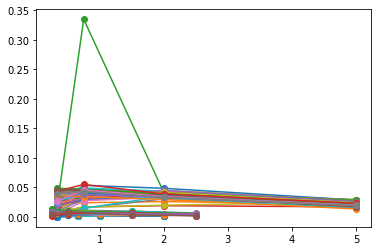

In [67]:
from matplotlib import pyplot as plt
import numpy as np

for index, row in data.timecourses.iterrows():
    # use the multi-index
    
    # print(row['time'], row['time_unit'])
    
    x = row['time']
    y = row['value']
    print(type(x))
    print(x, y)
    plt.plot(x, y, '-o')

plt.show()

# FIXME: make numerical arrays